In [1]:
from main import *
import matplotlib.pyplot as plt


df = pd.read_excel("data/example_data.xlsx")
event_list = load_event_list(df)

with open('distances.json', 'r') as fp:
   distances = json.load(fp)
distances = driving_distances(list(df['city'].unique()), distances)

algorithm_settings = {
    'selection_method' : "tournament",
    'tournament_size' : 10,
    'crossover_methods' : ["one_point", "two_point"],
    'mutation_methods' : ["uniform", "swap", "event_change"],
    'parents_percent' : 15,
    'mutation_size' : 0.15,
}

problem_settings = {
    'start_date': datetime(2022, 7, 4),
    'end_date': datetime(2022, 7, 15),
    'start_city': "Kraków",
    'product_price': 9.0,
    'max_capacity': 100000,
    'starting_ingredients': 500,
    'visitors_coeff': 0.2,
    'distance_coeff': 50 / 100000,
    'capacity_punishment_coeff': 18.0,
    'duration_punishment_coeff': 5000,
    'event_list': event_list,
    'distances': distances
}

Stały rozmiar populacji, zmienna ilość iteracji:

389 ms ± 48.9 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
740 ms ± 40.4 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
1.06 s ± 51.4 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
1.47 s ± 160 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
1.76 s ± 201 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
2.33 s ± 403 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
2.72 s ± 255 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
3.15 s ± 400 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
3.73 s ± 449 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
3.9 s ± 358 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
4.14 s ± 447 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
4.17 s ± 262 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
5.07 s ± 568 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
5.3 s ± 888 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
5.51 s ± 200 ms per loop (mean ± std. dev. of 5 runs, 1 loop 

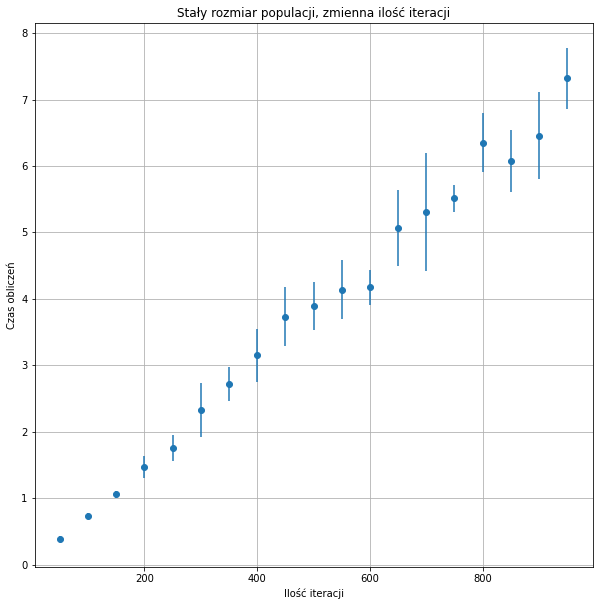

In [2]:
population_size = 100
generations_list = [x for x in range(50, 1000, 50)]
timing_avg = []
timing_stdev = []
for generations in generations_list:
    timing = %timeit -r 5 -o genetic_algorithm(**problem_settings, **algorithm_settings, population_size=population_size, generations=generations) # czas
    timing_avg.append(timing.average)
    timing_stdev.append(timing.stdev)

_, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.errorbar(generations_list, timing_avg, xerr=0, yerr=timing_stdev, fmt="o")
ax.set(xlabel="Ilość iteracji", ylabel="Czas obliczeń", title="Stały rozmiar populacji, zmienna ilość iteracji")
ax.grid()
plt.show()

Zmienny rozmiar populacji, stała ilość iteracji:

364 ms ± 34.1 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
743 ms ± 38.5 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
1.15 s ± 107 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
1.41 s ± 113 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
1.68 s ± 152 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
2.04 s ± 190 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
2.64 s ± 257 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
2.71 s ± 419 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
3.03 s ± 308 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
3.2 s ± 576 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
3.48 s ± 270 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
4.06 s ± 162 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
4.67 s ± 498 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
4.95 s ± 465 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
4.78 s ± 638 ms per loop (mean ± std. dev. of 5 runs, 1 loop 

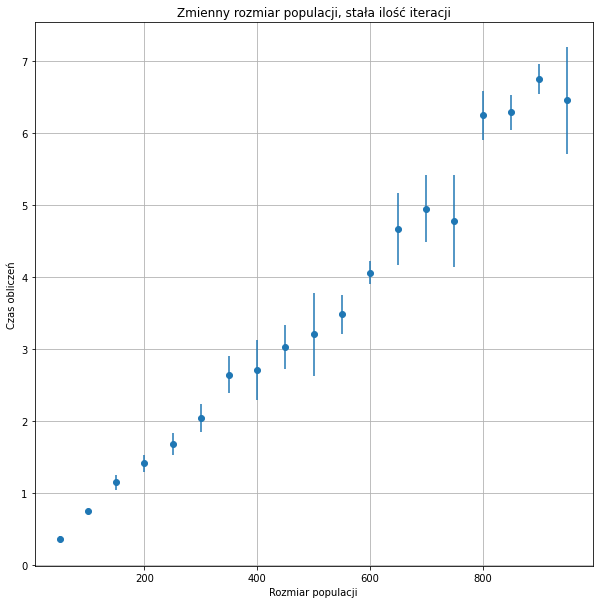

In [3]:
population_size_list = [x for x in range(50, 1000, 50)]
generations = 100
timing_avg = []
timing_stdev = []
for population_size in population_size_list:
    timing = %timeit -r 5 -o genetic_algorithm(**problem_settings, **algorithm_settings, population_size=population_size, generations=generations) # czas
    timing_avg.append(timing.average)
    timing_stdev.append(timing.stdev)

_, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.errorbar(generations_list, timing_avg, xerr=0, yerr=timing_stdev, fmt="o")
ax.set(xlabel="Rozmiar populacji", ylabel="Czas obliczeń", title="Zmienny rozmiar populacji, stała ilość iteracji")
ax.grid()
plt.show()